In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Part 1: Prepare the Data

In [2]:
file = "myopia.csv"
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
labels = df['MYOPIC'].values
X = df.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         9.87137728e-01,  1.00324150e+00,  2.57480672e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01]])

Part 2: Apply Dimensionality Reduction

In [5]:
pca = PCA(n_components=0.90)

X_pca = pca.fit_transform(scaled)

X_pca.shape

(618, 11)

In [6]:
scaled_data = pd.DataFrame(X_pca)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.001405,0.907642,-2.346239,1.062685,2.246584,-0.473569,-0.800659,0.711374,0.809448,-0.921241,0.264993
614,-0.646011,-1.797854,-0.397228,0.149875,0.326612,0.521456,0.377034,0.183911,-0.943828,0.891717,-0.006020
615,-0.913375,-2.262451,0.699241,-0.267697,0.334606,0.713550,0.702710,-0.357955,-1.385478,0.818801,0.197022
616,-1.161025,0.466183,0.336590,0.620981,-0.279144,-0.516132,0.001183,0.536952,1.530951,0.018101,-1.091853


In [7]:
tsne = TSNE(learning_rate=35)

In [8]:
tsne_features = tsne.fit_transform(scaled_data)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


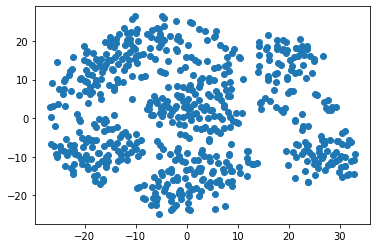

In [9]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

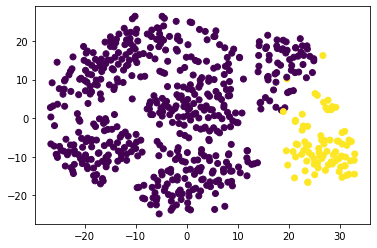

In [10]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

```
There are distinct clusters in the scaled dataset.
```

Part 3: Perform a Cluster Analysis with K-means

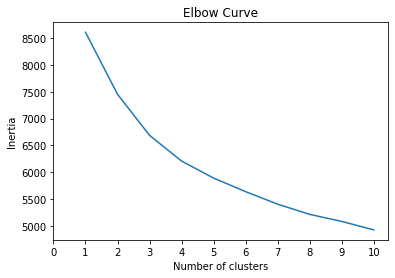

In [11]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_data)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

```
While not very visually distinct, the elbow appears to be at k=3, indicating that patients can be clustered into 3 groups
```